# Init
Import libraries and setup pipeline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from transformers import pipeline

In [3]:
classifier = pipeline(task="zero-shot-classification",
                      device=0,
                      model="roberta-large-mnli",
                      framework="tf")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at roberta-large-mnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


# Data
Define actions and targets and setup data in pandas friendly form

In [4]:
actions = {
    "select_project": "select project",
    "select_folder": "select folder",
    "select_timer": "select timer"
}
templates = {
    "timer": "I am trying to choose timer called {}",
    "project": "The project I am trying to select is named {}",
    "folder": "I want to view folder called {}"
}
timers = {
    "pomodoro": "Pomodoro 25",
    "ultradian": "Ultradian rhytm 90",
    "flow": "Flow stopwatch",
    "just": "Just 5"
}
projects = {
    "ztm_senior_web": "The Complete Junior to Senior Web Developer Roadmap (2021)",
    "ztm_machine_learning": "Complete Machine Learning and Data Science Bootcamp 2021",
    "adv_django": "Build a Backend REST API with Python and Django - Advanced",
    "ztm_junior_web": "The Complete Web Developer in 2021: Zero to Mastery"
}
folders = {
    "school": "School",
    "work": "Work",
    "personal_growth": "Personal Growth"
}
data = [
    ["select web",
    actions["select_project"], projects["ztm_junior_web"], templates["project"]],
    ["select project zero to mastery web dev in 2021",
     actions["select_project"], projects["ztm_junior_web"], templates["project"]],
    ["set project to zero to mastery web dev in 2021",
     actions["select_project"], projects["ztm_junior_web"], templates["project"]],
    ["choose projects to zero to mastery web dev in 2021",
    actions["select_project"], projects["ztm_junior_web"], templates["project"]],
    ["select project machine learning bootcamp",
    actions["select_project"], projects["ztm_machine_learning"], templates["project"]],
    ["select project junior to senior web dev",
    actions["select_project"], projects["ztm_senior_web"], templates["project"]],
    ["select project build a backend rest api with python and django advanced",
    actions["select_project"], projects["adv_django"], templates["project"]],
    ["select project rest api with django",
    actions["select_project"], projects["adv_django"], templates["project"]],
    ["select timer 25",
    actions["select_timer"], timers["pomodoro"], templates["timer"]],
    ["select timer pomodoro",
    actions["select_timer"], timers["pomodoro"], templates["timer"]],
    ["select timer rhytm",
    actions["select_timer"], timers["ultradian"], templates["timer"]],
    ["select timer 90",
    actions["select_timer"], timers["ultradian"], templates["timer"]],
    ["select timer ultradian rhytm 90",
    actions["select_timer"], timers["ultradian"], templates["timer"]],
    ["select timer ultradian ",
    actions["select_timer"], timers["ultradian"], templates["timer"]],
]
column_names = ["Command", "Expected action", "Expected target", "Hypothesis"]

# Utils
Printing mapping etc.

In [5]:
def map_results(res):
    mapped = dict(zip(res["labels"], res["scores"]))
    max_prob = max(mapped, key=mapped.get)
    return mapped, max_prob

In [6]:
def print_results(mapped, max_prob):
    for key, val in mapped.items():
        print(f"{key} => {val}")
    print(f"Max: {max_prob}")

In [7]:
def target_from_action(action):
    if (action == actions["select_project"]):
        return list(projects.values())
    elif (action == actions["select_timer"]):
        return list(timers.values())
    elif (action == actions["select_folder"]):
        return list(folders.values())
    else:
        return []

# Tests
Testing for commands defined

In [8]:
results = []
actions_match = None
targets_match = None
for value in data:
    print(value[0])
    res_action = classifier(value[0], list(actions.values()), hypothesis_template=value[3])
    map_action, max_action = map_results(res_action)
    print_results(map_action, max_action)
    
    if(max_action == value[1]):
        actions_match = 1
        print("Success!")
    else:
        actions_match = 0
        print("Failure")
    
    targets = target_from_action(max_action)
    
    res_target = classifier(value[0], targets, hypothesis_template=value[3])
    map_target, max_target = map_results(res_target)
    print_results(map_target, max_target)
    
    if(max_target == value[2]):
        targets_match = 1
        print("Success!")
    else:
        targets_match = 0
        print("Failure")
    
    results.append([value[0], max_action, max_target, actions_match, targets_match])
    
    print()

select web
select project => 0.5559870004653931
select folder => 0.24915561079978943
select timer => 0.19485728442668915
Max: select project
Success!
The Complete Web Developer in 2021: Zero to Mastery => 0.30160796642303467
Build a Backend REST API with Python and Django - Advanced => 0.29245540499687195
The Complete Junior to Senior Web Developer Roadmap (2021) => 0.25614848732948303
Complete Machine Learning and Data Science Bootcamp 2021 => 0.14978815615177155
Max: The Complete Web Developer in 2021: Zero to Mastery
Success!

select project zero to mastery web dev in 2021
select project => 0.7364611029624939
select folder => 0.1607850044965744
select timer => 0.10275385528802872
Max: select project
Success!
The Complete Web Developer in 2021: Zero to Mastery => 0.570254921913147
The Complete Junior to Senior Web Developer Roadmap (2021) => 0.2927192151546478
Complete Machine Learning and Data Science Bootcamp 2021 => 0.08791781216859818
Build a Backend REST API with Python and Djan

# Visualizing

In [9]:
df = pd.DataFrame(data, columns=column_names)
df

,Command,Expected action,Expected target,Hypothesis
0,select web,select project,The Complete Web Developer in 2021: Zero to Ma...,The project I am trying to select is named {}
1,select project zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,The project I am trying to select is named {}
2,set project to zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,The project I am trying to select is named {}
3,choose projects to zero to mastery web dev in ...,select project,The Complete Web Developer in 2021: Zero to Ma...,The project I am trying to select is named {}
4,select project machine learning bootcamp,select project,Complete Machine Learning and Data Science Boo...,The project I am trying to select is named {}
5,select project junior to senior web dev,select project,The Complete Junior to Senior Web Developer Ro...,The project I am trying to select is named {}
6,select project build a backend rest api with p...,select project,Build a Backend REST API with Python and Djang...,The project I am trying to select is named {}
7,select project rest api with django,select project,Build a Backend REST API with Python and Djang...,The project I am trying to select is named {}
8,select timer 25,select timer,Pomodoro 25,I am trying to choose timer called {}
9,select timer pomodoro,select timer,Pomodoro 25,I am trying to choose timer called {}


In [10]:
res_cols = ["Command", "Recognized Action", "Recognized Target", "Actions Match", "Targets Match"]
df_results = pd.DataFrame(results, columns=res_cols)
df_results

,Command,Recognized Action,Recognized Target,Actions Match,Targets Match
0,select web,select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
1,select project zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
2,set project to zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
3,choose projects to zero to mastery web dev in ...,select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
4,select project machine learning bootcamp,select project,Complete Machine Learning and Data Science Boo...,1,1
5,select project junior to senior web dev,select project,The Complete Junior to Senior Web Developer Ro...,1,1
6,select project build a backend rest api with p...,select project,Build a Backend REST API with Python and Djang...,1,1
7,select project rest api with django,select project,Build a Backend REST API with Python and Djang...,1,1
8,select timer 25,select timer,Pomodoro 25,1,1
9,select timer pomodoro,select timer,Pomodoro 25,1,1


In [11]:
joined_df = df.set_index("Command").join(df_results.set_index("Command"))
joined_df

,Expected action,Expected target,Hypothesis,Recognized Action,Recognized Target,Actions Match,Targets Match
Command,,,,,,,
select web,select project,The Complete Web Developer in 2021: Zero to Ma...,The project I am trying to select is named {},select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
select project zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,The project I am trying to select is named {},select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
set project to zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,The project I am trying to select is named {},select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
choose projects to zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,The project I am trying to select is named {},select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
select project machine learning bootcamp,select project,Complete Machine Learning and Data Science Boo...,The project I am trying to select is named {},select project,Complete Machine Learning and Data Science Boo...,1,1
select project junior to senior web dev,select project,The Complete Junior to Senior Web Developer Ro...,The project I am trying to select is named {},select project,The Complete Junior to Senior Web Developer Ro...,1,1
select project build a backend rest api with python and django advanced,select project,Build a Backend REST API with Python and Djang...,The project I am trying to select is named {},select project,Build a Backend REST API with Python and Djang...,1,1
select project rest api with django,select project,Build a Backend REST API with Python and Djang...,The project I am trying to select is named {},select project,Build a Backend REST API with Python and Djang...,1,1
select timer 25,select timer,Pomodoro 25,I am trying to choose timer called {},select timer,Pomodoro 25,1,1


In [12]:
joined_df["Actions Match"].value_counts()

1    14
Name: Actions Match, dtype: int64

In [13]:
joined_df["Targets Match"].value_counts()

1    14
Name: Targets Match, dtype: int64

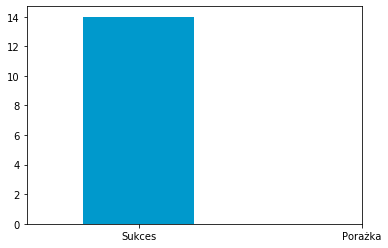

In [14]:
joined_df["Actions Match"].value_counts().plot(kind="bar", color=["#0099CC", "#CC0000"])
plt.xticks(np.arange(0, 1, step=1))
plt.xticks(np.arange(2), ('Sukces', 'Porażka'))
plt.xticks(np.arange(2), rotation = 0)
plt.show()

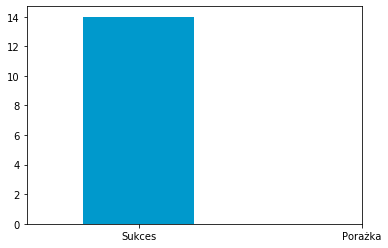

In [15]:
joined_df["Targets Match"].value_counts().plot(kind="bar", color=["#0099CC", "#CC0000"])
plt.xticks(np.arange(0, 1, step=1))
plt.xticks(np.arange(2), ('Sukces', 'Porażka'))
plt.xticks(np.arange(2), rotation = 0)
plt.show()